In [8]:
import pandas as pd
import numpy as np

In [9]:
conf_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recv_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [33]:
# extract dates
dates = conf_df.columns[4:]

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Confirmed')

In [34]:
dates = deaths_df.columns[4:]

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Deaths')

In [35]:
dates = recv_df.columns[4:]

recv_df_long = recv_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Recovered')

In [36]:
print(conf_df_long.shape)
print(deaths_df_long.shape)
print(recv_df_long.shape)

(292757, 6)
(288133, 6)
(273178, 6)


In [37]:
full_table = pd.merge(left=conf_df_long, right=deaths_df_long, how='left',on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
full_table = pd.merge(left=full_table, right=recv_df_long, how='left', on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])

full_table.shape

(292757, 8)

In [38]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0.0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0.0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0.0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0.0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0.0,0.0


In [39]:
full_table['Confirmed'].isna().sum()

0

In [40]:
full_table['Deaths'].isna().sum()

4624

In [41]:
full_table['Recovered'].isna().sum()

25561

In [42]:
# Convert to proper date format
full_table['Date'] = pd.to_datetime(full_table['Date'])

# fill na with 0
full_table['Recovered'] = full_table['Recovered'].fillna(0)

# convert to int datatype
full_table['Recovered'] = full_table['Recovered'].astype('int')

In [43]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0


In [44]:
# renaming countries, regions, provinces
full_table['Country/Region'] = full_table['Country/Region'].replace('Korea, South', 'South Korea')

# Greenland
full_table.loc[full_table['Province/State']=='Greenland', 'Country/Region'] = 'Greenland'

# Mainland china to China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

In [45]:
full_table.shape

(292757, 8)

In [46]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0


In [47]:
# removing canada's recovered values
full_table = full_table[full_table['Province/State'].str.contains('Recovered')!=True]

# removing county wise data to avoid double counting
full_table = full_table[full_table['Province/State'].str.contains(',')!=True]

In [48]:
full_table.shape

(290731, 8)

In [49]:
# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0.0,0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0,0.0


In [50]:
full_table[['Province/State']] = full_table[['Province/State']].fillna('')

# fill missing numerical values with 0
cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']

full_table[cols] = full_table[cols].fillna(0)

# fixing datatypes
full_table['Recovered'] = full_table['Recovered'].astype(int)

# random rows
full_table.sample(6)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
38493,,Central African Republic,6.6111,20.9394,2020-06-03,1173,4.0,23,1146.0
74729,,Latvia,56.8796,24.6032,2020-10-06,2194,40.0,1322,832.0
59764,,Senegal,14.4974,-14.4524,2020-08-15,12032,251.0,7637,4144.0
74244,,US,40.0000,-100.0000,2020-10-04,7428703,208710.0,2911699,4308294.0
289590,Queensland,Australia,-27.4698,153.0251,2022-10-20,1661088,0.0,0,0.0
43825,,Micronesia,7.4256,150.5508,2020-06-21,0,0.0,0,0.0


In [51]:
# new values
feb_12_conf = {'Hubei' : 34874}

In [52]:
# function to change value
def change_val(date, ref_col, val_col, dtnry):
    for key, val in dtnry.items():
        full_table.loc[(full_table['Date']==date) & (full_table[ref_col]==key), val_col] = val

In [53]:
# changing values
change_val('2/12/20', 'Province/State', 'Confirmed', feb_12_conf)

In [54]:
# checking values
full_table[(full_table['Date']=='2/12/20') & (full_table['Province/State']=='Hubei')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
6141,Hubei,China,30.9756,112.2707,2020-02-12,34874,1068.0,2686,29612.0


In [55]:
# ship rows containing ships with COVID-19 reported cases
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | \
            full_table['Province/State'].str.contains('Diamond Princess') | \
            full_table['Country/Region'].str.contains('Diamond Princess') | \
            full_table['Country/Region'].str.contains('MS Zaandam')

# ship
ship = full_table[ship_rows]

# Latest cases from the ships
ship_latest = ship[ship['Date']==max(ship['Date'])]
# ship_latest.style.background_gradient(cmap='Pastel1_r')

# skipping rows with ships info
full_table = full_table[~(ship_rows)]

In [56]:
full_table.shape

(286679, 9)

In [57]:
who_region = {}

# African Region AFRO
afro = "Algeria, Angola, Cabo Verde, Eswatini, Sao Tome and Principe, Benin, South Sudan, Western Sahara, Congo (Brazzaville), Congo (Kinshasa), Cote d'Ivoire, Botswana, Burkina Faso, Burundi, Cameroon, Cape Verde, Central African Republic, Chad, Comoros, Ivory Coast, Democratic Republic of the Congo, Equatorial Guinea, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mauritius, Mozambique, Namibia, Niger, Nigeria, Republic of the Congo, Rwanda, São Tomé and Príncipe, Senegal, Seychelles, Sierra Leone, Somalia, South Africa, Swaziland, Togo, Uganda, Tanzania, Zambia, Zimbabwe"
afro = [i.strip() for i in afro.split(',')]
for i in afro:
    who_region[i] = 'Africa'
    
# Region of the Americas PAHO
paho = 'Antigua and Barbuda, Argentina, Bahamas, Barbados, Belize, Bolivia, Brazil, Canada, Chile, Colombia, Costa Rica, Cuba, Dominica, Dominican Republic, Ecuador, El Salvador, Grenada, Guatemala, Guyana, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Suriname, Trinidad and Tobago, United States, US, Uruguay, Venezuela'
paho = [i.strip() for i in paho.split(',')]
for i in paho:
    who_region[i] = 'Americas'

# South-East Asia Region SEARO
searo = 'Bangladesh, Bhutan, North Korea, India, Indonesia, Maldives, Myanmar, Burma, Nepal, Sri Lanka, Thailand, Timor-Leste'
searo = [i.strip() for i in searo.split(',')]
for i in searo:
    who_region[i] = 'South-East Asia'

# European Region EURO
euro = 'Albania, Andorra, Greenland, Kosovo, Holy See, Liechtenstein, Armenia, Czechia, Austria, Azerbaijan, Belarus, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Kazakhstan, Kyrgyzstan, Latvia, Lithuania, Luxembourg, Malta, Monaco, Montenegro, Netherlands, North Macedonia, Norway, Poland, Portugal, Moldova, Romania, Russia, San Marino, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Tajikistan, Turkey, Turkmenistan, Ukraine, United Kingdom, Uzbekistan'
euro = [i.strip() for i in euro.split(',')]
for i in euro:
    who_region[i] = 'Europe'

# Eastern Mediterranean Region EMRO
emro = 'Afghanistan, Bahrain, Djibouti, Egypt, Iran, Iraq, Jordan, Kuwait, Lebanon, Libya, Morocco, Oman, Pakistan, Palestine, West Bank and Gaza, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, Yemen'
emro = [i.strip() for i in emro.split(',')]
for i in emro:
    who_region[i] = 'Eastern Mediterranean'

# Western Pacific Region WPRO
wpro = 'Australia, Brunei, Cambodia, China, Cook Islands, Fiji, Japan, Kiribati, Laos, Malaysia, Marshall Islands, Micronesia, Mongolia, Nauru, New Zealand, Niue, Palau, Papua New Guinea, Philippines, South Korea, Samoa, Singapore, Solomon Islands, Taiwan, Taiwan*, Tonga, Tuvalu, Vanuatu, Vietnam'
wpro = [i.strip() for i in wpro.split(',')]
for i in wpro:
    who_region[i] = 'Western Pacific'

In [58]:
# add 'WHO Region' column
full_table['WHO Region'] = full_table['Country/Region'].map(who_region)

# find missing values
full_table[full_table['WHO Region'].isna()]['Country/Region'].unique()

array(['Antarctica', 'Korea, North', 'Summer Olympics 2020',
       'Winter Olympics 2022'], dtype=object)

In [59]:
# Cleaning data
# =============

# fixing Country values
full_table.loc[full_table['Province/State']=='Greenland', 'Country/Region'] = 'Greenland'

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[['Confirmed', 'Deaths', 'Recovered', 'Active']] = full_table[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# fixing datatypes
full_table['Recovered'] = full_table['Recovered'].astype(int)

full_table.sample(6)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
109203,,Tajikistan,38.8610,71.2761,2021-02-02,13714,91.0,13218,405.0,Europe
122192,,Singapore,1.2833,103.8333,2021-03-19,60167,30.0,60019,118.0,Western Pacific
85269,Tasmania,Australia,-42.8821,147.3272,2020-11-12,230,13.0,217,0.0,Western Pacific
27808,Guangdong,China,23.3417,113.4244,2020-04-27,1587,8.0,1547,32.0,Western Pacific
136471,Gansu,China,35.7518,104.2861,2021-05-08,193,2.0,190,1.0,Western Pacific
145373,,Antigua and Barbuda,17.0608,-61.7964,2021-06-08,1263,42.0,1214,7.0,Americas


In [77]:
full_table.to_csv('covid_19_clean_complete.csv', index=False)

In [78]:
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

C:\Users\INSAKUM46\AppData\Local\Temp\ipykernel_9108\1890584991.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


In [79]:
# new cases ======================================================
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

C:\Users\INSAKUM46\AppData\Local\Temp\ipykernel_9108\2600901409.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']


In [80]:
temp

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,NaN,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0,0.0
...,...,...,...,...,...
202595,Zimbabwe,2022-10-26,0.0,0.0,0.0
202596,Zimbabwe,2022-10-27,0.0,0.0,0.0
202597,Zimbabwe,2022-10-28,0.0,0.0,0.0
202598,Zimbabwe,2022-10-29,0.0,0.0,0.0


In [91]:
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

mask

0          True
1         False
2         False
3         False
4         False
          ...  
202595    False
202596    False
202597    False
202598    False
202599    False
Name: Country/Region, Length: 202600, dtype: bool

In [88]:
temp

,Country/Region,Date,New cases,New deaths,New recovered
0,Afghanistan,2020-01-22,NaN,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0,0.0
...,...,...,...,...,...
202595,Zimbabwe,2022-10-26,0.0,0.0,0.0
202596,Zimbabwe,2022-10-27,0.0,0.0,0.0
202597,Zimbabwe,2022-10-28,0.0,0.0,0.0
202598,Zimbabwe,2022-10-29,0.0,0.0,0.0


In [89]:
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']

In [90]:
temp

,Country/Region,Date,New cases,New deaths,New recovered
0,Afghanistan,2020-01-22,NaN,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0,0.0
...,...,...,...,...,...
202595,Zimbabwe,2022-10-26,0.0,0.0,0.0
202596,Zimbabwe,2022-10-27,0.0,0.0,0.0
202597,Zimbabwe,2022-10-28,0.0,0.0,0.0
202598,Zimbabwe,2022-10-29,0.0,0.0,0.0


In [84]:
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

In [85]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0.0,0,0.0,NaN,NaN,NaN
1,2020-01-22,Albania,0,0.0,0,0.0,NaN,NaN,NaN
2,2020-01-22,Algeria,0,0.0,0,0.0,NaN,NaN,NaN
3,2020-01-22,Andorra,0,0.0,0,0.0,NaN,NaN,NaN
4,2020-01-22,Angola,0,0.0,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
202595,2022-10-30,West Bank and Gaza,703014,0.0,0,703014.0,0.0,0.0,0.0
202596,2022-10-30,Winter Olympics 2022,535,0.0,0,535.0,0.0,0.0,0.0
202597,2022-10-30,Yemen,11939,0.0,0,11939.0,0.0,0.0,0.0
202598,2022-10-30,Zambia,333681,0.0,0,333681.0,7.0,0.0,0.0


In [61]:
# Grouped by day, country
# =======================

full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

# new cases ======================================================
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# =================================================================

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')

full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

full_grouped.head()

C:\Users\INSAKUM46\AppData\Local\Temp\ipykernel_9108\509884717.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
C:\Users\INSAKUM46\AppData\Local\Temp\ipykernel_9108\509884717.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0.0,0,0.0,0,0,0
1,2020-01-22,Albania,0,0.0,0,0.0,0,0,0
2,2020-01-22,Algeria,0,0.0,0,0.0,0,0,0
3,2020-01-22,Andorra,0,0.0,0,0.0,0,0,0
4,2020-01-22,Angola,0,0.0,0,0.0,0,0,0


In [136]:
# add 'WHO Region' column
full_grouped['WHO Region'] = full_grouped['Country/Region'].map(who_region)

# find missing values
full_grouped[full_grouped['WHO Region'].isna()]['Country/Region'].unique()

array(['Antarctica', 'Korea, North', 'Summer Olympics 2020',
       'Winter Olympics 2022'], dtype=object)

In [137]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0.0,0,0.0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0.0,0,0.0,0,0,0,Europe
2,2020-01-22,Algeria,0,0.0,0,0.0,0,0,0,Africa
3,2020-01-22,Andorra,0,0.0,0,0.0,0,0,0,Europe
4,2020-01-22,Angola,0,0.0,0,0.0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
202595,2022-10-30,West Bank and Gaza,703014,0.0,0,703014.0,0,0,0,Eastern Mediterranean
202596,2022-10-30,Winter Olympics 2022,535,0.0,0,535.0,0,0,0,NaN
202597,2022-10-30,Yemen,11939,0.0,0,11939.0,0,0,0,Eastern Mediterranean
202598,2022-10-30,Zambia,333681,0.0,0,333681.0,7,0,0,Africa


In [138]:
# Day wise
# ========

# table
day_wise = full_grouped.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 
                                        'Active', 'New cases', 'New deaths', 'New recovered'].sum().reset_index()

# number cases per 100 cases
day_wise['Deaths / 100 Cases'] = round((day_wise['Deaths']/day_wise['Confirmed'])*100, 2)
day_wise['Recovered / 100 Cases'] = round((day_wise['Recovered']/day_wise['Confirmed'])*100, 2)
day_wise['Deaths / 100 Recovered'] = round((day_wise['Deaths']/day_wise['Recovered'])*100, 2)

# no. of countries
day_wise['No. of countries'] = full_grouped[full_grouped['Confirmed']!=0] \
                                    .groupby('Date')['Country/Region'] \
                                    .unique() \
                                    .apply(len)\
                                    .values

# fillna by 0
cols = ['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']
day_wise[cols] = day_wise[cols].fillna(0)

day_wise.head()

C:\Users\INSAKUM46\AppData\Local\Temp\ipykernel_8332\891845641.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_wise = full_grouped.groupby('Date')['Confirmed', 'Deaths', 'Recovered',


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,557,17.0,30,510.0,0,0,0,3.05,5.39,56.67,6
1,2020-01-23,657,18.0,32,607.0,100,1,2,2.74,4.87,56.25,9
2,2020-01-24,944,26.0,39,879.0,287,8,7,2.75,4.13,66.67,10
3,2020-01-25,1437,42.0,42,1353.0,493,16,3,2.92,2.92,100.00,12
4,2020-01-26,2120,56.0,56,2008.0,683,14,14,2.64,2.64,100.00,13


In [140]:
from datetime import datetime, timedelta

In [162]:
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])


# getting latest values
country_wise = full_grouped[full_grouped['Date']==max(full_grouped['Date'])].reset_index(drop=True).drop('Date', axis=1)

print(country_wise.shape)

# group by country
country_wise = country_wise.groupby('Country/Region')['Confirmed', 'Deaths', 
                                                      'Recovered', 'Active', 'New cases', 
                                                      'New deaths', 'New recovered'].sum().reset_index()

print(country_wise.shape)

# per 100 cases
country_wise['Deaths / 100 Cases'] = round((country_wise['Deaths']/country_wise['Confirmed'])*100, 2)
country_wise['Recovered / 100 Cases'] = round((country_wise['Recovered']/country_wise['Confirmed'])*100, 2)
country_wise['Deaths / 100 Recovered'] = round((country_wise['Deaths']/country_wise['Recovered'])*100, 2)

(200, 9)
(200, 8)


C:\Users\INSAKUM46\AppData\Local\Temp\ipykernel_8332\1273708228.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country_wise = country_wise.groupby('Country/Region')['Confirmed', 'Deaths',


In [158]:
country_wise

In [141]:
# Country wise
# ============

full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])


print(country_wise.shape)

# group by country
country_wise = country_wise.groupby('Country/Region')['Confirmed', 'Deaths', 
                                                      'Recovered', 'Active', 
                                                      'New cases', 'New deaths', 'New recovered'].sum().reset_index()
print(country_wise.shape)


# per 100 cases
country_wise['Deaths / 100 Cases'] = round((country_wise['Deaths']/country_wise['Confirmed'])*100, 2)
country_wise['Recovered / 100 Cases'] = round((country_wise['Recovered']/country_wise['Confirmed'])*100, 2)
country_wise['Deaths / 100 Recovered'] = round((country_wise['Deaths']/country_wise['Recovered'])*100, 2)

cols = ['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']
country_wise[cols] = country_wise[cols].fillna(0)


# 1 week increase and % change
# ============================

today = full_grouped[full_grouped['Date']==max(full_grouped['Date'])] \
            .reset_index(drop=True) \
            .drop('Date', axis=1)[['Country/Region', 'Confirmed']]

last_week = full_grouped[full_grouped['Date']==max(full_grouped['Date'])-timedelta(days=7)] \
                .reset_index(drop=True) \
                .drop('Date', axis=1)[['Country/Region', 'Confirmed']]

temp = pd.merge(today, last_week, on='Country/Region', suffixes=(' today', ' last week'))
temp['1 week change'] = temp['Confirmed today'] - temp['Confirmed last week']
temp = temp[['Country/Region', 'Confirmed last week', '1 week change']]

country_wise = pd.merge(country_wise, temp, on='Country/Region')
country_wise['1 week % increase'] = round(country_wise['1 week change']/country_wise['Confirmed last week']*100, 2)
country_wise.head()

country_wise['WHO Region'] = country_wise['Country/Region'].map(who_region)
country_wise[country_wise['WHO Region'].isna()]['Country/Region'].unique()

country_wise.head()

(200, 9)
(200, 8)


C:\Users\INSAKUM46\AppData\Local\Temp\ipykernel_8332\1663829604.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country_wise = country_wise.groupby('Country/Region')['Confirmed', 'Deaths',


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,202966,0.0,0,202966.0,132,0,0,0.0,0.0,0.0,202108,858,0.42,Eastern Mediterranean
1,Albania,332966,0.0,0,332966.0,17,0,0,0.0,0.0,0.0,332772,194,0.06,Europe
2,Algeria,270836,0.0,0,270836.0,7,0,0,0.0,0.0,0.0,270783,53,0.02,Africa
3,Andorra,46535,0.0,0,46535.0,0,0,0,0.0,0.0,0.0,46449,86,0.19,Europe
4,Angola,103131,0.0,0,103131.0,0,0,0,0.0,0.0,0.0,103131,0,0.00,Africa


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Density'>

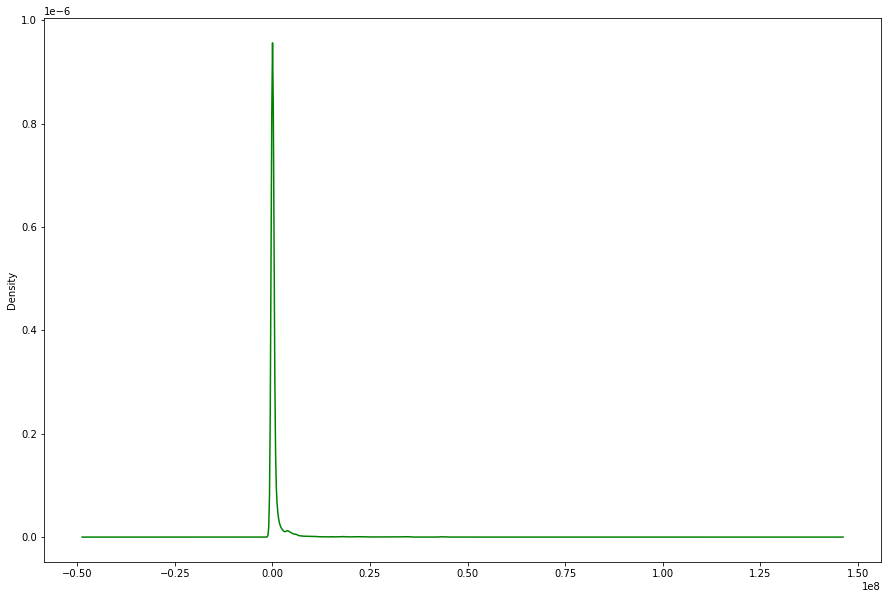

In [81]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

full_table['Confirmed'].plot.density(color='green')

In [78]:


full_table['Active'].unique()

array([0.0000000e+00, 1.0000000e+00, 1.4000000e+01, ..., 5.3937400e+05,
       1.1448386e+07,           nan])

In [ ]:
conf_df

In [4]:
conf_df.shape

(289, 1017)

In [15]:
conf_df.loc[(conf_df['Country/Region'] == "Yemen")]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/22,10/6/22,10/7/22,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939


In [24]:
# extract dates
dates = conf_df.columns[4:]

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],value_vars=dates, var_name='Date', value_name='Confirmed')

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/2020,0
1,NaN,Albania,41.153300,20.168300,1/22/2020,0
2,NaN,Algeria,28.033900,1.659600,1/22/2020,0
3,NaN,Andorra,42.506300,1.521800,1/22/2020,0
4,NaN,Angola,-11.202700,17.873900,1/22/2020,0
...,...,...,...,...,...,...
292752,NaN,West Bank and Gaza,31.952200,35.233200,10/30/2022,703014
292753,NaN,Winter Olympics 2022,39.904200,116.407400,10/30/2022,535
292754,NaN,Yemen,15.552727,48.516388,10/30/2022,11939
292755,NaN,Zambia,-13.133897,27.849332,10/30/2022,333681


In [ ]:
conf_df_long[(conf_df_long['Date'] == '2/2/20')]

In [29]:
conf_df_long

conf_df_long.loc[(conf_df_long['Date'] == "2/2/2020")]

,Province/State,Country/Region,Lat,Long,Date,Confirmed


In [ ]:
conf_df_long

In [ ]:
df.loc[(df.origin == "JFK")

In [ ]:
shape(conf_df)

In [ ]:
# extract dates
dates = conf_df.columns[4:]

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],value_vars=dates, var_name='Date', value_name='Confirmed')

In [ ]:
conf_df.iloc[288128:,]

In [ ]:
conf_df_long.iloc[288128:,]